In [4]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# show data folder path
print("Data folder path:", os.path.abspath("../data") if os.path.exists("../data") else "create data/ and add CSVs")


Data folder path: C:\Users\dhanya work\desktop\git\Fake-News-Detection\data


In [5]:

fake_path = "../data/Fake.csv"
real_path = "../data/True.csv"

# Example safe load:
try:
    fake = pd.read_csv(fake_path)
    real = pd.read_csv(real_path)
    fake['label'] = 'fake'
    real['label'] = 'real'
    df = pd.concat([fake[['text','label']], real[['text','label']]], ignore_index=True)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    print("Loaded df shape:", df.shape)
except Exception as e:
    print("Load error:", e)


Loaded df shape: (44898, 2)


,text,label,length
0,"21st Century Wire says Ben Stein, reputable pr...",fake,171
1,WASHINGTON (Reuters) - U.S. President Donald T...,real,771
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,real,304


label
fake    23481
real    21417
Name: count, dtype: int64


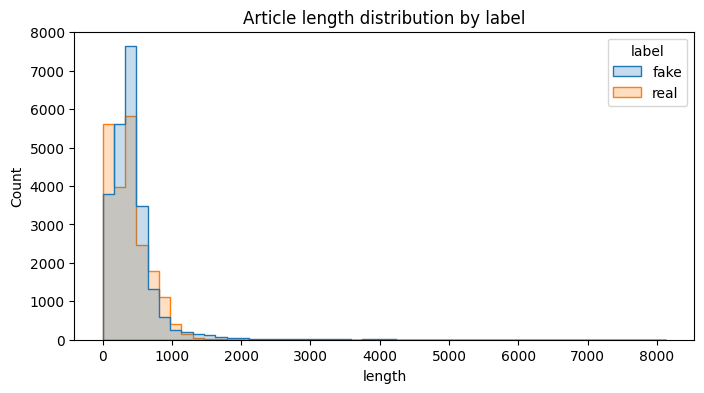

In [6]:
# EDA
df['length'] = df['text'].astype(str).str.split().apply(len)
display(df.head(3))
print(df['label'].value_counts())

# histogram of text length
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='length', hue='label', bins=50, element='step', stat='count')
plt.title("Article length distribution by label")
plt.show()


In [9]:
import nltk
for pkg in ["punkt", "punkt_tab", "stopwords", "wordnet"]:
    nltk.download(pkg)
print("NLTK downloads complete.")

import sys
sys.path.append('..') 
from src.preprocess import clean_text
print(clean_text("This is a TEST. Visit http://example.com now! Running, ran."))

[nltk_data] Downloading package punkt to C:\Users\dhanya
[nltk_data]     work\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\dhanya
[nltk_data]     work\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to C:\Users\dhanya
[nltk_data]     work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\dhanya
[nltk_data]     work\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NLTK downloads complete.
test visit running ran
